# Final project AAI-551
name : Shrey Shah   
CWid : 20009523

# Data analysis on Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Printing total null value in dataset

In [6]:
print(df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Taking mean for filling null value in 'Age' column. removing whole row where null in 'Embarked'column and Cabin data is not useful for us here. 

In [7]:
#df = df.dropna(subset=["Age"])
df = df.dropna(subset=["Embarked"])
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


# Creating custom function for summary of dataset

In [9]:
def custom_summry(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch',  'Fare']:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in df[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [10]:
custom_summry(df)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,PassengerId,889,1.00,224.0000,446.000000,446.000000,668.0,444.0000,891.0000,66048.060811,256.998173,0.000000,-1.197156,Fairly Symmetric(+ve),No outlier
1,Survived,889,0.00,0.0000,0.382452,0.000000,1.0,1.0000,1.0000,0.236448,0.486260,0.484568,-1.769179,Fairly Symmetric(+ve),No outlier
2,Pclass,889,1.00,2.0000,2.311586,3.000000,3.0,1.0000,3.0000,0.696724,0.834700,-0.636998,-1.269437,Moderately Negatively Skewed,No outlier
3,Age,889,0.42,22.0000,29.642093,29.642093,35.0,13.0000,80.0000,168.178006,12.968346,0.434355,0.980555,Fairly Symmetric(+ve),Has outlier
4,SibSp,889,0.00,0.0000,0.524184,0.000000,1.0,1.0000,8.0000,1.218164,1.103705,3.691058,17.838972,Higly (+ve) Skewed,Has outlier
5,Parch,889,0.00,0.0000,0.382452,0.000000,0.0,0.0000,6.0000,0.650863,0.806761,2.745160,9.750592,Higly (+ve) Skewed,Has outlier
6,Fare,889,0.00,7.8958,32.096681,14.454200,31.0,23.1042,512.3292,2469.841935,49.697504,4.801440,33.508477,Higly (+ve) Skewed,Has outlier


# Replacing value to 0 and 1 in "Sex" column.(one hot encoding)

In [11]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

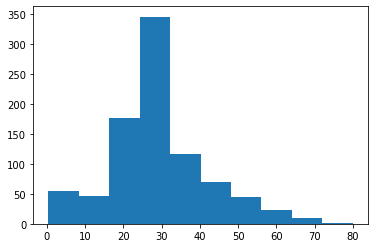

In [12]:
plt.hist(df['Age'])
plt.show()

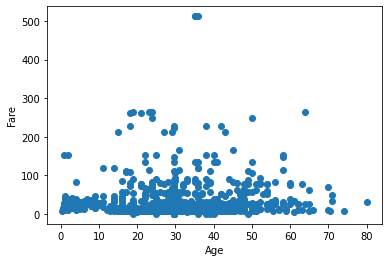

In [13]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [14]:
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
print(pivot_table)

Pclass         1         2         3
Sex                                 
0       0.967391  0.921053  0.500000
1       0.368852  0.157407  0.135447


In [15]:
grouped = df.groupby(['Sex'])
print(grouped['Survived'].mean())

Sex
0    0.740385
1    0.188908
Name: Survived, dtype: float64


In [16]:
def calculate_range(column):
    return column.max() - column.min()

In [17]:
for column in ['Age', 'Fare']:
    print(f"Range of {column}: {calculate_range(df[column])}")

Range of Age: 79.58
Range of Fare: 512.3292


In [18]:
corr = df.corr()
print(corr)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005028 -0.035330  0.043136  0.030335 -0.057686   
Survived       -0.005028  1.000000 -0.335549 -0.541585 -0.074513 -0.034040   
Pclass         -0.035330 -0.335549  1.000000  0.127741 -0.328256  0.081656   
Sex             0.043136 -0.541585  0.127741  1.000000  0.089339 -0.116348   
Age             0.030335 -0.074513 -0.328256  0.089339  1.000000 -0.231908   
SibSp          -0.057686 -0.034040  0.081656 -0.116348 -0.231908  1.000000   
Parch          -0.001657  0.083151  0.016824 -0.247508 -0.178013  0.414542   
Fare            0.012703  0.255290 -0.548193 -0.179958  0.088780  0.160887   

                Parch      Fare  
PassengerId -0.001657  0.012703  
Survived     0.083151  0.255290  
Pclass       0.016824 -0.548193  
Sex         -0.247508 -0.179958  
Age         -0.178013  0.088780  
SibSp        0.414542  0.160887  
Parch        1.000000  0.217532  
Fare         0.217532  1.

<AxesSubplot: >

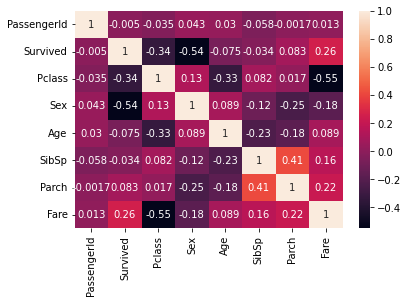

In [19]:
sns.heatmap(corr, annot=True)

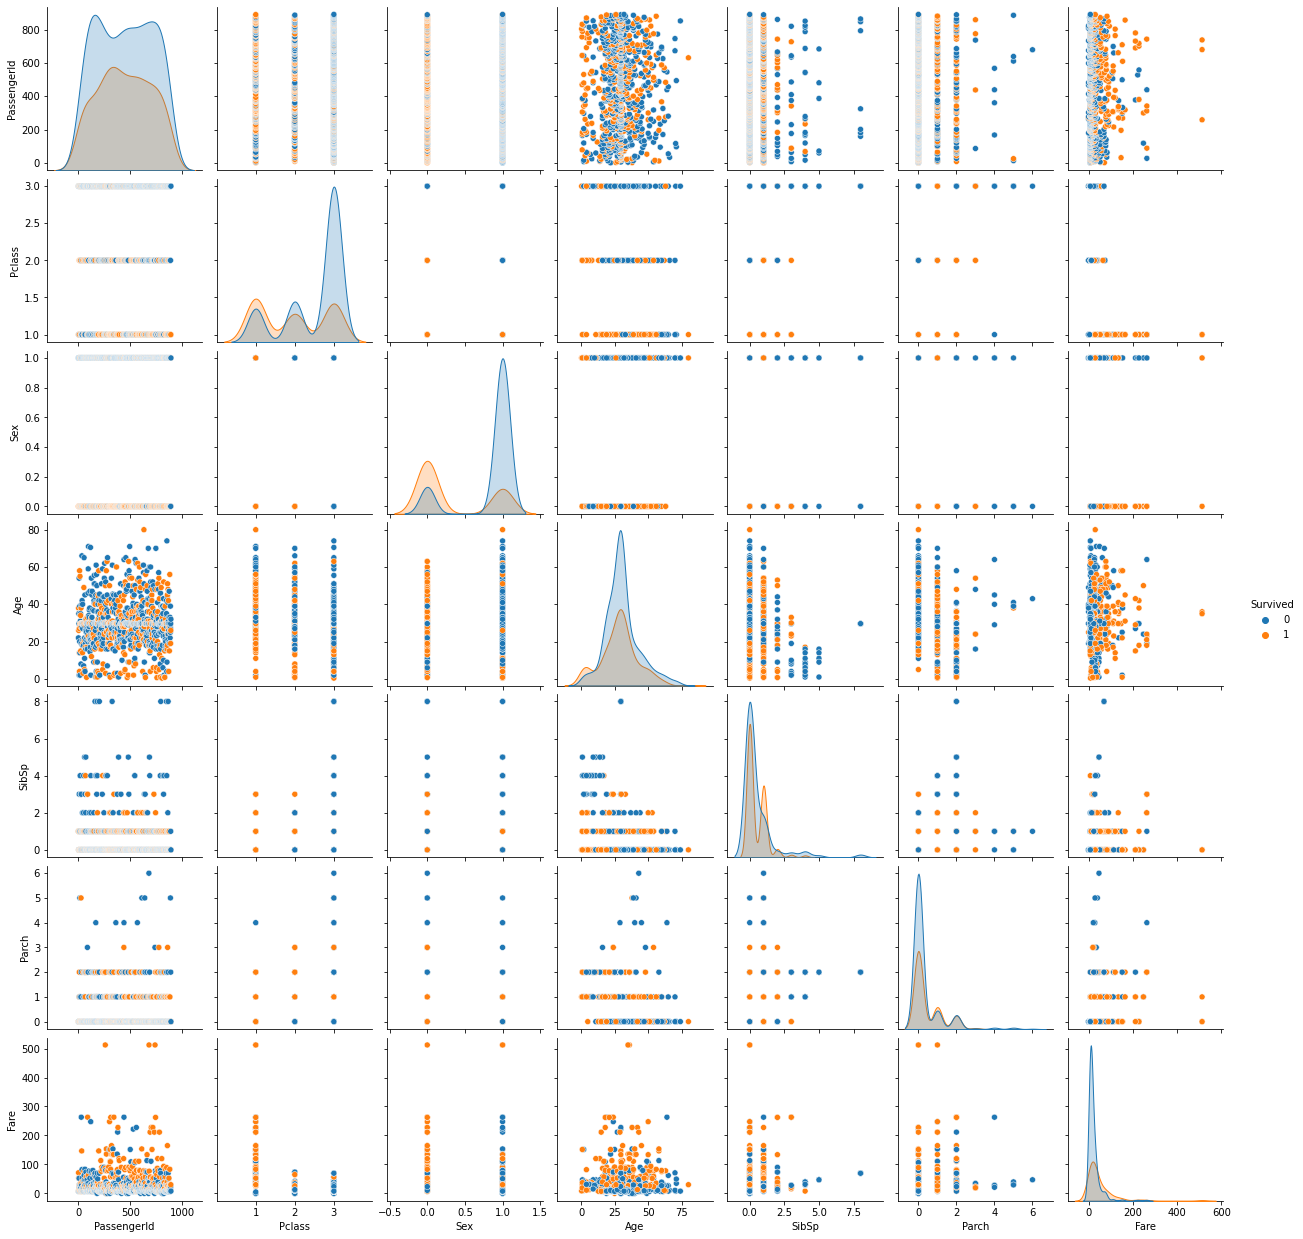

In [20]:
sns.pairplot(df, hue='Survived')

## Creating Linear Regression model for the dataset

In [21]:
df = df.dropna()
X = df[['Age']]
y = df['Fare']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [22]:
y_pred_lr = model.predict(X)

In [23]:
mse_lr = mean_squared_error(y, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

Mean Squared Error (Linear Regression): 5528.790593725354


In [24]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 89.50614523345867
Coefficient: [-0.38177097]


# Creating Logistic Regression model for the dataset

In [25]:
X = df[['Age', 'Fare']]
y = df['Survived']

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [26]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [1.59377664]
Coefficients: [[-0.03323302  0.00406343]]


In [27]:
y_pred_logr = model.predict(X)


In [28]:
acc_logr = accuracy_score(y, y_pred_logr)
print(f"Accuracy (Logistic Regression): {acc_logr}")

Accuracy (Logistic Regression): 0.6831683168316832


In [29]:
# Create a single DataFrame with the true values and predictions
predictions = pd.DataFrame({'Linear Regression': y_pred_lr, 'Logistic Regression': y_pred_logr, 'True Value': y})


# Ploting the predictions

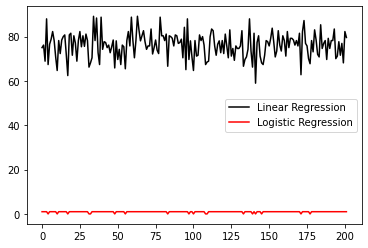

In [30]:
plt.plot(y_pred_lr, label='Linear Regression', color='black')
plt.plot(y_pred_logr, label='Logistic Regression', color='red')
plt.legend()
plt.show()

# Create a distribution plot

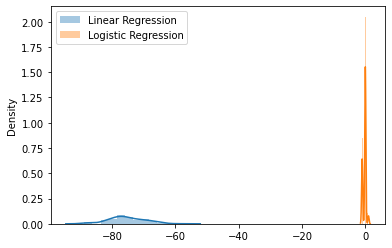

In [31]:
sns.distplot(predictions['True Value'] - predictions['Linear Regression'], label='Linear Regression')
sns.distplot(predictions['True Value'] - predictions['Logistic Regression'], label='Logistic Regression')
plt.legend()
plt.show()

# Create a scatter plot with the true values and the predictions

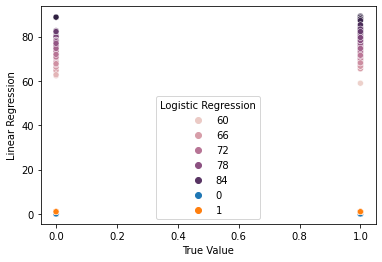

In [32]:
sns.scatterplot(data=predictions, x='True Value', y='Linear Regression', hue='Linear Regression')
sns.scatterplot(data=predictions, x='True Value', y='Logistic Regression', hue='Logistic Regression')
plt.show()